# **Sentiment Analysis of Product Reviews - Machine Learning**

### Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

### Inputs

* Write down which data or information you need to run the notebook 

### Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

### Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\admin\\Documents\\vscode-projects\\ci-hackathon-sentiment-analysis-of-product-reviews\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\admin\\Documents\\vscode-projects\\ci-hackathon-sentiment-analysis-of-product-reviews'

---

## Initial Setup

Import relevant libraries and extract cleaned sample dataset

In [8]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re  

In [9]:
df = pd.read_csv('data/Reviews_Sample_Cleaned.csv')
print("Data loaded successfully")
print(df.shape)
df.head()

Data loaded successfully
(20000, 12)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,Sentiment
0,406806,B000LKXCB8,ALFO2XQISZ9QM,A.K.,1,1,1,1342396800,.,"What a waste!!! Hardly any ""Mirch"" (Green Chil...",2012-07-16,Negative
1,75918,B001CPOR2E,A7G9M0IE7LABX,Kevin,2,3,1,1310947200,Treat caused ulcers in my dog's GI tract,I should have known when I touched these strip...,2011-07-18,Negative
2,400895,B0016PC4TS,A22M0C1YXBGW1Y,"LuLu, Calif",8,10,1,1274486400,Waste of Money,Don't waste your money! Did nothing to repell ...,2010-05-22,Negative
3,480705,B00719WZNS,A2PA1INHPVXLBF,THE DUDE,0,0,1,1350086400,"ALL FIZZ, NOT MUCH FLAVOR",I RECIEVED MY DRINKS AND WAS LOOKING FOR LOTS ...,2012-10-13,Negative
4,103600,B005MSH01C,A3CZ8V0M91JEKP,unsatisfied user,4,5,1,1307404800,Grossest cola ever,"I've had the SodaStream SodaMix - Cola before,...",2011-06-07,Negative


---

# Section 2

Section 2 content

In [11]:
print("\n1. Cleaning text for machine learning...")

def clean_text_for_ml(text):
    """Clean text: lowercase, remove special chars, extra spaces"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text_for_ml)
print("   ✅ Text cleaned")

# Show example
print(f"\nExample:")
print(f"Original: {df['Text'].iloc[0][:80]}...")
print(f"Cleaned:  {df['Cleaned_Text'].iloc[0][:80]}...")



1. Cleaning text for machine learning...
   ✅ Text cleaned

Example:
Original: What a waste!!! Hardly any "Mirch" (Green Chillis) in it and really oily. Doesn'...
Cleaned:  what a waste hardly any mirch green chillis in it and really oily doesnt look an...


In [12]:
print("\n2. Preparing training and test data...")

X = df['Cleaned_Text']  # Features (review text)
y = df['Sentiment']     # Target (Positive/Neutral/Negative)

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Keep same proportion of each sentiment
)

print(f"   Training set: {len(X_train):,} reviews")
print(f"   Test set: {len(X_test):,} reviews")


2. Preparing training and test data...
   Training set: 16,000 reviews
   Test set: 4,000 reviews


In [13]:
print("\n3. Converting text to numbers (TF-IDF vectorization)...")

tfidf = TfidfVectorizer(
    max_features=5000,      # Use top 5000 most important words
    ngram_range=(1, 2),     # Use single words and word pairs
    stop_words='english',   # Remove common words (the, is, at, etc.)
    min_df=2                # Word must appear at least 2 times
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"   ✅ Created {X_train_tfidf.shape[1]:,} features")
print(f"   Matrix shape: {X_train_tfidf.shape}")



3. Converting text to numbers (TF-IDF vectorization)...
   ✅ Created 5,000 features
   Matrix shape: (16000, 5000)


In [14]:
print("\n4. Training Logistic Regression model...")

model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0  # Regularization strength
)

model.fit(X_train_tfidf, y_train)
print("   ✅ Model trained successfully!")


4. Training Logistic Regression model...
   ✅ Model trained successfully!


In [15]:
print("\n5. Making predictions on test set...")

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f"   ✅ Predictions complete!")


5. Making predictions on test set...
   ✅ Predictions complete!


In [16]:
print("\n" + "="*70)
print("MODEL PERFORMANCE")
print("="*70)

print(f"\n✅ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nDetailed Classification Report:")
print("-" * 70)
print(classification_report(y_test, y_pred))


MODEL PERFORMANCE

✅ Accuracy: 0.8430 (84.30%)

Detailed Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.76      0.50      0.60       577
     Neutral       0.40      0.05      0.08       299
    Positive       0.86      0.98      0.92      3124

    accuracy                           0.84      4000
   macro avg       0.67      0.51      0.53      4000
weighted avg       0.81      0.84      0.81      4000




7. Creating confusion matrix...


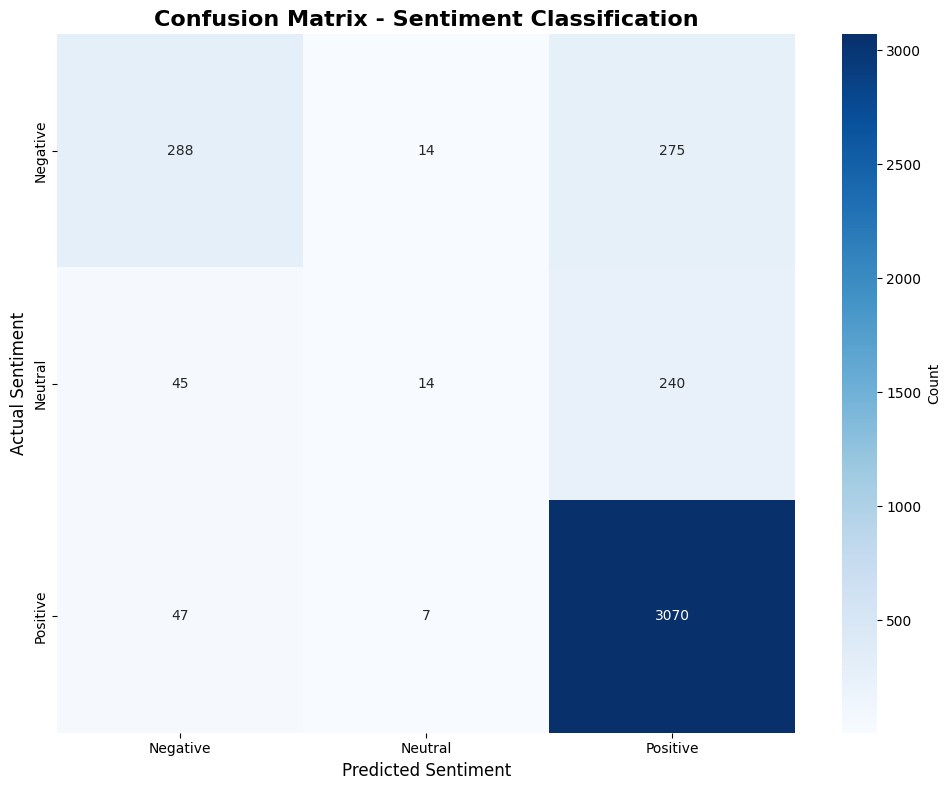

   ✅ Confusion matrix displayed


In [17]:
print("\n7. Creating confusion matrix...")

cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Neutral', 'Positive'],
           yticklabels=['Negative', 'Neutral', 'Positive'],
           cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Sentiment Classification', fontsize=16, fontweight='bold')
plt.ylabel('Actual Sentiment', fontsize=12)
plt.xlabel('Predicted Sentiment', fontsize=12)
plt.tight_layout()
plt.show()

print("   ✅ Confusion matrix displayed")

In [19]:
print("\n" + "="*70)
print("TESTING MODEL WITH NEW REVIEWS")
print("="*70)

def predict_sentiment(review_text):
    """Predict sentiment for a new review"""
    cleaned = clean_text_for_ml(review_text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    probabilities = model.predict_proba(vectorized)[0]
    confidence = max(probabilities)
    
    return {
        'sentiment': prediction,
        'confidence': confidence,
        'probabilities': dict(zip(model.classes_, probabilities))
    }
# Test examples
test_examples = [
    "This coffee is absolutely amazing! Best I've ever tasted.",
    "Terrible product. Complete waste of money. Do not buy!",
    "It's okay, nothing special. Average quality for the price.",
    "Love this! Perfect taste and arrived quickly. Highly recommend!",
    "Disappointed with the quality. Expected much better."
]

print("\nExample Predictions:")
print("-" * 70)

for i, review in enumerate(test_examples, 1):
    result = predict_sentiment(review)
    print(f"\n{i}. Review: \"{review}\"")
    print(f"   → Sentiment: {result['sentiment']}")
    print(f"   → Confidence: {result['confidence']:.2%}")
    print(f"   → Probabilities:")
    for sent, prob in result['probabilities'].items():
        print(f"      {sent}: {prob:.2%}")


TESTING MODEL WITH NEW REVIEWS

Example Predictions:
----------------------------------------------------------------------

1. Review: "This coffee is absolutely amazing! Best I've ever tasted."
   → Sentiment: Positive
   → Confidence: 97.18%
   → Probabilities:
      Negative: 2.21%
      Neutral: 0.61%
      Positive: 97.18%

2. Review: "Terrible product. Complete waste of money. Do not buy!"
   → Sentiment: Negative
   → Confidence: 99.35%
   → Probabilities:
      Negative: 99.35%
      Neutral: 0.41%
      Positive: 0.24%

3. Review: "It's okay, nothing special. Average quality for the price."
   → Sentiment: Neutral
   → Confidence: 67.21%
   → Probabilities:
      Negative: 17.39%
      Neutral: 67.21%
      Positive: 15.40%

4. Review: "Love this! Perfect taste and arrived quickly. Highly recommend!"
   → Sentiment: Positive
   → Confidence: 99.83%
   → Probabilities:
      Negative: 0.11%
      Neutral: 0.06%
      Positive: 99.83%

5. Review: "Disappointed with the quality

In [20]:
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print(f"\n✅ Model Type: Logistic Regression")
print(f"✅ Training Data: {len(X_train):,} reviews")
print(f"✅ Test Data: {len(X_test):,} reviews")
print(f"✅ Features Used: {X_train_tfidf.shape[1]:,} TF-IDF features")
print(f"✅ Accuracy: {accuracy*100:.2f}%")
print(f"\n✅ Model can now classify any review as Positive, Neutral, or Negative!")

print("\n" + "="*70)
print("✅ NLP CLASSIFICATION COMPLETE!")
print("="*70)


SUMMARY

✅ Model Type: Logistic Regression
✅ Training Data: 16,000 reviews
✅ Test Data: 4,000 reviews
✅ Features Used: 5,000 TF-IDF features
✅ Accuracy: 84.30%

✅ Model can now classify any review as Positive, Neutral, or Negative!

✅ NLP CLASSIFICATION COMPLETE!


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
